In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values

In [81]:
label = []
for i in range(len(data)):
    label.append([i % 5 + 1])

In [83]:
label = np.array(label)
data = np.concatenate((data, label), axis=1)

In [5]:
def compute_distance(a, b):

    dist = #distance between a and b#

    return dist

SyntaxError: invalid syntax (<ipython-input-5-b06a7b013bd0>, line 3)

In [6]:
def compute_centroid(Z):

    center = #centroid of a set of points in P#
    
    return center


SyntaxError: invalid syntax (<ipython-input-6-4b9334ace606>, line 3)

In [7]:
def compute_label(z, M):

    label = #label of point z with a set of centroids M#
    
    return label


SyntaxError: invalid syntax (<ipython-input-7-7e1a10ea89d1>, line 3)

In [8]:
def compute_loss(C, M):

    loss = #compute loss#
    
    return loss


SyntaxError: invalid syntax (<ipython-input-8-a2085343f220>, line 3)

## 1. Plot the data points [1pt]

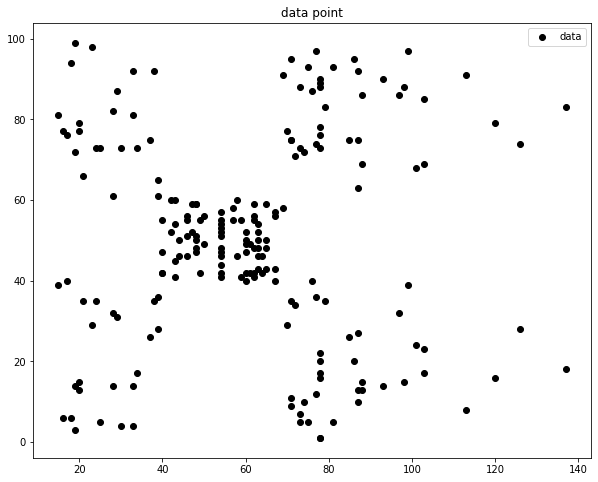

In [25]:
fig = plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c = 'black', label='data')
plt.title("data point")
plt.legend()
plt.show()

## 2. Visualise the initial condition of the point labels [1pt]

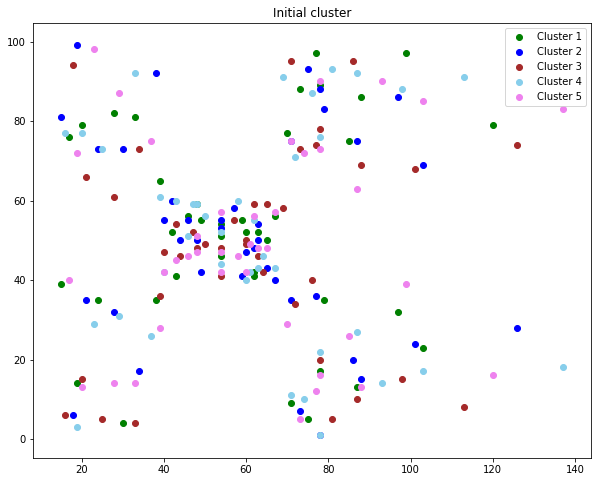

In [106]:
Cluster1 = []
Cluster2 = []
Cluster3 = []
Cluster4 = []
Cluster5 = []
color_list = ["green", "blue", "brown", "skyblue", "violet"]
name_list = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]

fig = plt.figure(figsize=(10,8))
for i in range(data.shape[0]):
    if data[i][2] == 1:
        Cluster1.append(data[i])
 
    elif data[i][2] == 2:
        Cluster2.append(data[i])

        
    elif data[i][2] == 3:
        Cluster3.append(data[i])

        
    elif data[i][2] == 4:
        Cluster4.append(data[i])

        
    elif data[i][2] == 5:
        Cluster5.append(data[i])

plt.scatter(np.array(Cluster1)[:,0], np.array(Cluster1)[:,1], c = color_list[0], label = name_list[0])
plt.scatter(np.array(Cluster2)[:,0], np.array(Cluster2)[:,1], c = color_list[1], label = name_list[1])
plt.scatter(np.array(Cluster3)[:,0], np.array(Cluster3)[:,1], c = color_list[2], label = name_list[2])
plt.scatter(np.array(Cluster4)[:,0], np.array(Cluster4)[:,1], c = color_list[3], label = name_list[3])
plt.scatter(np.array(Cluster5)[:,0], np.array(Cluster5)[:,1], c = color_list[4], label = name_list[4])

plt.title("Initial cluster")
plt.legend()
plt.show()

## 3. Plot the loss curve [5pt]

## 4. Plot the centroid of each clsuter [5pt]

## 5. Plot the final clustering result [5pt]

